# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f'{url}appid={weather_api_key}&units={units}&q='
counter = 1

citycity = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

print('********************************')
print('City Number and Name Information')
print('********************************')

for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        citycity.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        print(f'City Number - {counter} | City Name - {city}')
        counter = counter + 1
    except KeyError:
        print('City Not Found')

cion
City Number - 118 | City Name - srivardhan
City Not Found
City Number - 119 | City Name - port alfred
City Number - 120 | City Name - herat
City Number - 121 | City Name - barrhead
City Number - 122 | City Name - shache
City Number - 123 | City Name - severo-yeniseyskiy
City Number - 124 | City Name - chuy
City Number - 125 | City Name - thompson
City Number - 126 | City Name - sao joao da barra
City Not Found
City Number - 127 | City Name - newport
City Number - 128 | City Name - lillooet
City Not Found
City Number - 129 | City Name - coihaique
City Number - 130 | City Name - ongandjera
City Number - 131 | City Name - saint-philippe
City Number - 132 | City Name - cruzeiro do sul
City Not Found
City Number - 133 | City Name - college
City Number - 134 | City Name - skjervoy
City Number - 135 | City Name - lompoc
City Number - 136 | City Name - marzuq
City Number - 137 | City Name - lebu
City Number - 138 | City Name - hastings
City Number - 139 | City Name - kijang
City Number - 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
city_df = pd.DataFrame({
    'City': citycity,
    'Latitude': lat,
    'Longitude': lng,
    'Maximum Temperature': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
    })
city_df

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.07,172.79,81.03,74,{'all': 85},1.19,KI,1594683636
1,Punta Arenas,-53.15,-70.92,35.60,80,{'all': 90},8.05,CL,1594683119
2,Dikson,73.51,80.55,39.34,97,{'all': 100},14.61,RU,1594683291
3,Jamestown,42.10,-79.24,71.01,64,{'all': 1},10.29,US,1594683177
4,Rikitea,-23.12,-134.97,73.17,85,{'all': 53},12.10,PF,1594683547
...,...,...,...,...,...,...,...,...,...
579,Itoman,26.12,127.67,87.80,84,{'all': 20},8.05,JP,1594683824
580,Sarankhola,22.31,89.79,80.24,91,{'all': 99},4.52,BD,1594683824
581,Carauari,-4.88,-66.90,75.31,90,{'all': 82},1.86,BR,1594683592
582,New Amsterdam,6.25,-57.52,75.83,92,{'all': 2},2.73,GY,1594683825


In [18]:
city_df.to_csv('Cities Compiled.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
humidity_over100 = city_df['Humidity'] > 100
humidity_over100.value_counts()
# No Cities over 100% Humidity - All Columns Returned False
# Skipping this Step Per Instructions

False    584
Name: Humidity, dtype: int64

In [5]:
#  Get the indices of cities that have humidity over 100%.


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [7]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

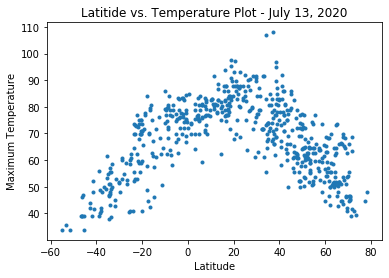

In [46]:
## Latitude vs. Temperature Plot
x_lat = city_df['Latitude']
y_temp = city_df['Maximum Temperature']
plt.scatter(x_lat, y_temp, marker='.')
plt.title('Latitide vs. Temperature Plot - July 13, 2020')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.savefig('graphs/LatitudeMaxTempScatterPlot.png')

## Latitude vs. Humidity Plot

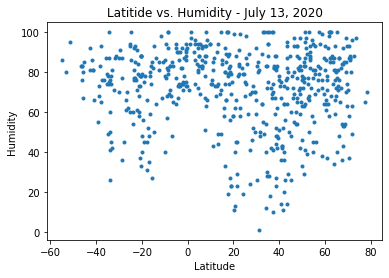

In [48]:
x_lat = city_df['Latitude']
y_hum = city_df['Humidity']
plt.scatter(x_lat, y_hum, marker='.')
plt.title('Latitide vs. Humidity - July 13, 2020')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('graphs/LatitudeHumidityScatterPlot.png')

## Latitude vs. Cloudiness Plot

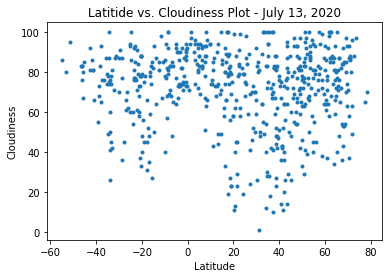

In [49]:
x_lat = city_df['Latitude']
y_cloud = city_df['Cloudiness']
plt.scatter(x_lat, y_temp, marker='.')
plt.title('Latitide vs. Cloudiness Plot - July 13, 2020')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('graphs/LatitudeCloudinessScatterPlot.png')

## Latitude vs. Wind Speed Plot

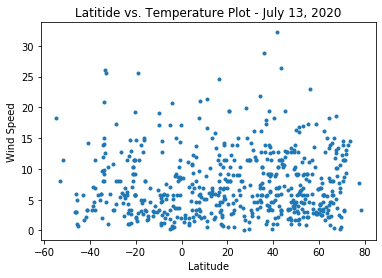

In [50]:
x_lat = city_df['Latitude']
y_wind = city_df['Wind Speed']
plt.scatter(x_lat, y_wind, marker='.')
plt.title('Latitide vs. Temperature Plot - July 13, 2020')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('graphs/LatitudeWindSpeedScatterPlot.png')

## Linear Regression

In [8]:
# OPTIONAL: Create a function to create Linear Regression plots

In [9]:
# Create Northern and Southern Hemisphere DataFrames
n_hemi_df = city_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression